# Results from water masses analysis

## 1. Volume of NADW

In [116]:
%matplotlib inline

In [117]:
import xarray as xr
import matplotlib.pyplot as plt
import nc_time_axis
import cftime

In [118]:
pic_start = cftime.num2date(0, 'days since 0001-01-01')
pic_end = cftime.num2date(1200*365, 'days since 0001-01-01')

In [9]:
!ls ../data

basin_codes.r360x180.nc  nadw_CESM2_ssp585.nc  nadw_CM4_ssp585.nc
nadw_CESM2_hist.nc	 nadw_CM4_hist.nc
nadw_CESM2_piC.nc	 nadw_CM4_piC.nc


### 1.1 Pre-industrial control

In [44]:
ds_nadw_CESM2_piC = xr.open_dataset('../data/nadw_CESM2_piC.nc')
ds_nadw_CM4_piC = xr.open_dataset('../data/nadw_CM4_piC.nc')

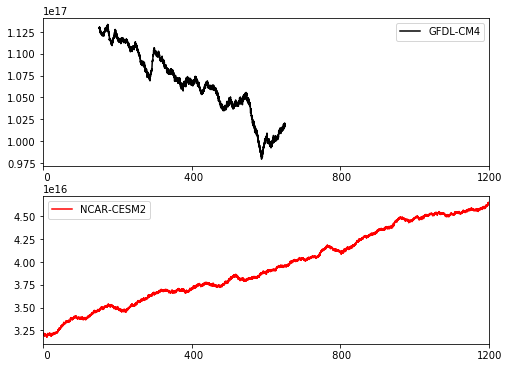

In [45]:
plt.figure(figsize=[8,6])
ax1 = plt.subplot(211)
plt.plot(ds_nadw_CM4_piC['time'], ds_nadw_CM4_piC['vol_nadw_atl'], 'k')
plt.legend(['GFDL-CM4'])
ax1.set_xlim([pic_start, pic_end])
ax2 = plt.subplot(212)
plt.plot(ds_nadw_CESM2_piC['time'], ds_nadw_CESM2_piC['vol_nadw_atl'], 'r')
ax2.set_xlim([pic_start, pic_end])
plt.legend(['NCAR-CESM2'])

### 1.2 Historical

In [93]:
ds_nadw_CESM2_hist = xr.open_dataset('../data/nadw_CESM2_hist.nc')
ds_nadw_CM4_hist = xr.open_dataset('../data/nadw_CM4_hist.nc')

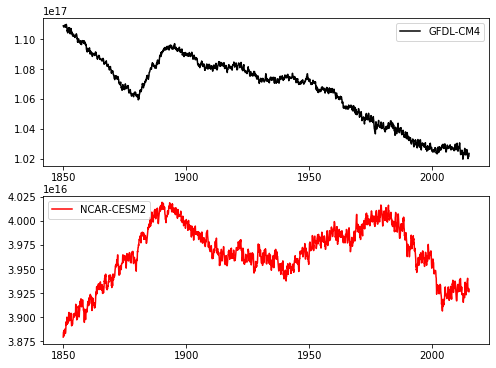

In [108]:
plt.figure(figsize=[8,6])
ax1 = plt.subplot(211)
plt.plot(ds_nadw_CM4_hist['time'], ds_nadw_CM4_hist['vol_nadw_atl'], 'k')
plt.legend(['GFDL-CM4'])
#ax1.set_xlim([hist_start, hist_end])
ax2 = plt.subplot(212)
plt.plot(ds_nadw_CESM2_hist['time'], ds_nadw_CESM2_hist['vol_nadw_atl'], 'r')
#ax2.set_xlim([hist_start, hist_end])
plt.legend(['NCAR-CESM2'])

### 1.3 SSP 585

In [110]:
ds_nadw_CESM2_ssp585 = xr.open_dataset('../data/nadw_CESM2_ssp585.nc')
ds_nadw_CM4_ssp585 = xr.open_dataset('../data/nadw_CM4_ssp585.nc')

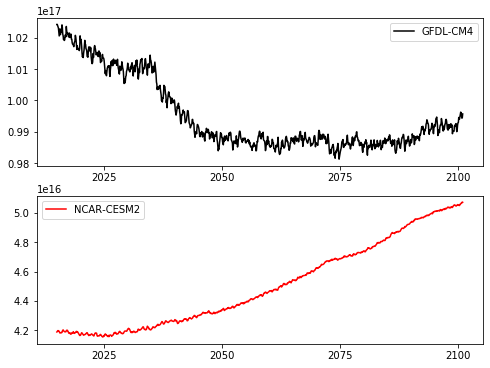

In [111]:
plt.figure(figsize=[8,6])
ax1 = plt.subplot(211)
plt.plot(ds_nadw_CM4_ssp585['time'], ds_nadw_CM4_ssp585['vol_nadw_atl'], 'k')
plt.legend(['GFDL-CM4'])
#ax1.set_xlim([hist_start, hist_end])
ax2 = plt.subplot(212)
plt.plot(ds_nadw_CESM2_ssp585['time'], ds_nadw_CESM2_ssp585['vol_nadw_atl'], 'r')
#ax2.set_xlim([hist_start, hist_end])
plt.legend(['NCAR-CESM2'])

## 2. Vertical distribution of water mass temperature in the Atlantic

This is done only in the pre-industrial control to try to understand discrepancies between the two models.

In [119]:
ds_vol_CESM2 = xr.open_dataset('../data/volume_waters_atl_CESM2_piC.nc') 
ds_vol_CM4 = xr.open_dataset('../data/volume_waters_atl_CM4_piC.nc') 

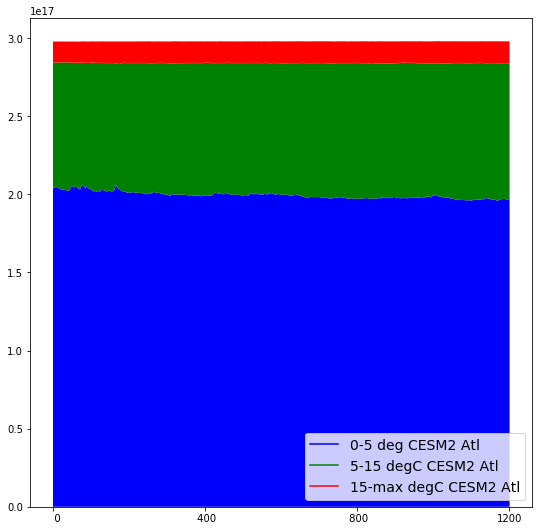

In [130]:
plt.figure(figsize=[9,9])
plt.plot([],[],color='b', label='0-5 deg CESM2 Atl')
plt.plot([],[],color='g', label='5-15 degC CESM2 Atl')
plt.plot([],[],color='r', label='15-max degC CESM2 Atl')

plt.stackplot(ds_vol_CESM2['time'].values,
              ds_vol_CESM2['vol_deep'],
              ds_vol_CESM2['vol_interm'],
              ds_vol_CESM2['vol_surface'],
              colors=['b','g','r'])
plt.legend(loc=4, fontsize=14)

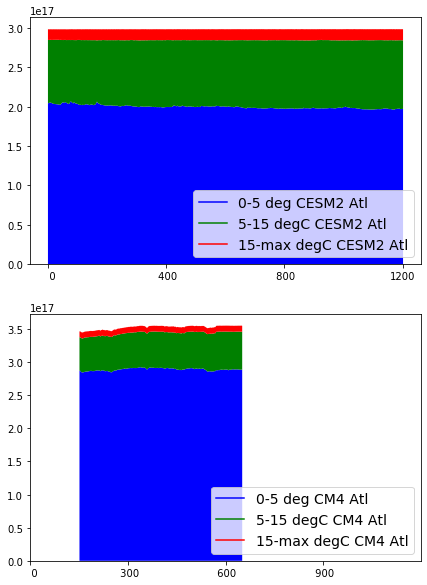

In [140]:
plt.figure(figsize=[7,10])
ax1 = plt.subplot(211)
plt.plot([],[],color='b', label='0-5 deg CESM2 Atl')
plt.plot([],[],color='g', label='5-15 degC CESM2 Atl')
plt.plot([],[],color='r', label='15-max degC CESM2 Atl')

plt.stackplot(ds_vol_CESM2['time'].values,
              ds_vol_CESM2['vol_deep'],
              ds_vol_CESM2['vol_interm'],
              ds_vol_CESM2['vol_surface'],
              colors=['b','g','r'])
plt.legend(loc=4, fontsize=14)

ax2 = plt.subplot(212)
plt.plot([],[],color='b', label='0-5 deg CM4 Atl')
plt.plot([],[],color='g', label='5-15 degC CM4 Atl')
plt.plot([],[],color='r', label='15-max degC CM4 Atl')

plt.stackplot(ds_vol_CM4['time'].values,
              ds_vol_CM4['vol_deep'],
              ds_vol_CM4['vol_interm'],
              ds_vol_CM4['vol_surface'],
              colors=['b','g','r'])
ax2.set_xlim([pic_start, pic_end])
#plt.xticks([cftime.DatetimeNoLeap(0,1,1), 
#            cftime.DatetimeNoLeap(400,1,1),
#            cftime.DatetimeNoLeap(800,1,1),
#            cftime.DatetimeNoLeap(1200,1,1)], [0, 400, 800, 1200])
plt.legend(loc=4, fontsize=14)

Text(0.5, 1.0, 'Change in deep water during piControl (bins 0 to 5 degrees, m3)')

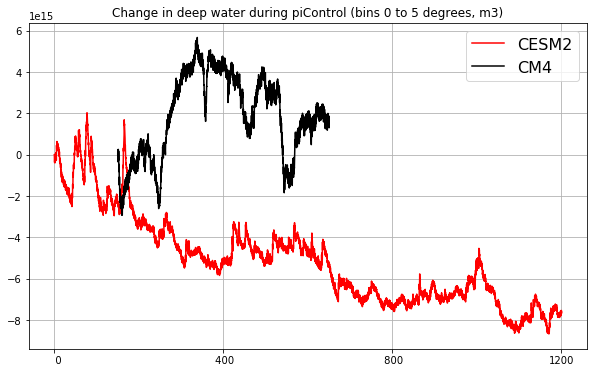

In [152]:
plt.figure(figsize=[10,6])
plt.plot(ds_vol_CESM2['time'], ds_vol_CESM2['vol_deep']-ds_vol_CESM2['vol_deep'].isel(time=0), 'r')
plt.plot(ds_vol_CM4['time'], ds_vol_CM4['vol_deep']-ds_vol_CM4['vol_deep'].isel(time=0), 'k')
plt.grid()
plt.legend(['CESM2', 'CM4'], fontsize=16)
plt.title('Change in deep water during piControl (bins 0 to 5 degrees, m3)')

Text(0.5, 1.0, 'Change in intermediate water during piControl (bins 5 to 15 degrees, m3)')

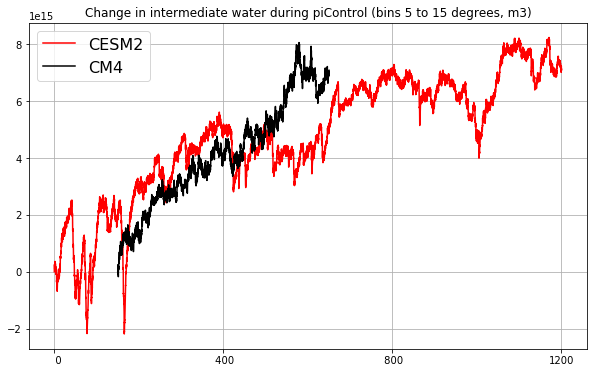

In [153]:
plt.figure(figsize=[10,6])
plt.plot(ds_vol_CESM2['time'], ds_vol_CESM2['vol_interm']-ds_vol_CESM2['vol_interm'].isel(time=0), 'r')
plt.plot(ds_vol_CM4['time'], ds_vol_CM4['vol_interm']-ds_vol_CM4['vol_interm'].isel(time=0), 'k')
plt.grid()
plt.legend(['CESM2', 'CM4'], fontsize=16)
plt.title('Change in intermediate water during piControl (bins 5 to 15 degrees, m3)')

Text(0.5, 1.0, 'Change in surface water during piControl (bins 15 to max degrees, m3)')

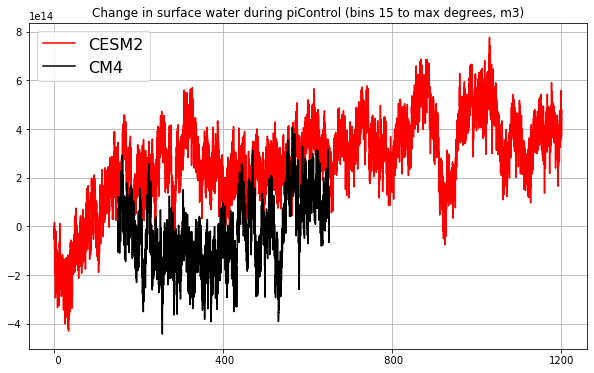

In [155]:
plt.figure(figsize=[10,6])
plt.plot(ds_vol_CESM2['time'], ds_vol_CESM2['vol_surface']-ds_vol_CESM2['vol_surface'].isel(time=0), 'r')
plt.plot(ds_vol_CM4['time'], ds_vol_CM4['vol_surface']-ds_vol_CM4['vol_surface'].isel(time=0), 'k')
plt.grid()
plt.legend(['CESM2', 'CM4'], fontsize=16)
plt.title('Change in surface water during piControl (bins 15 to max degrees, m3)')